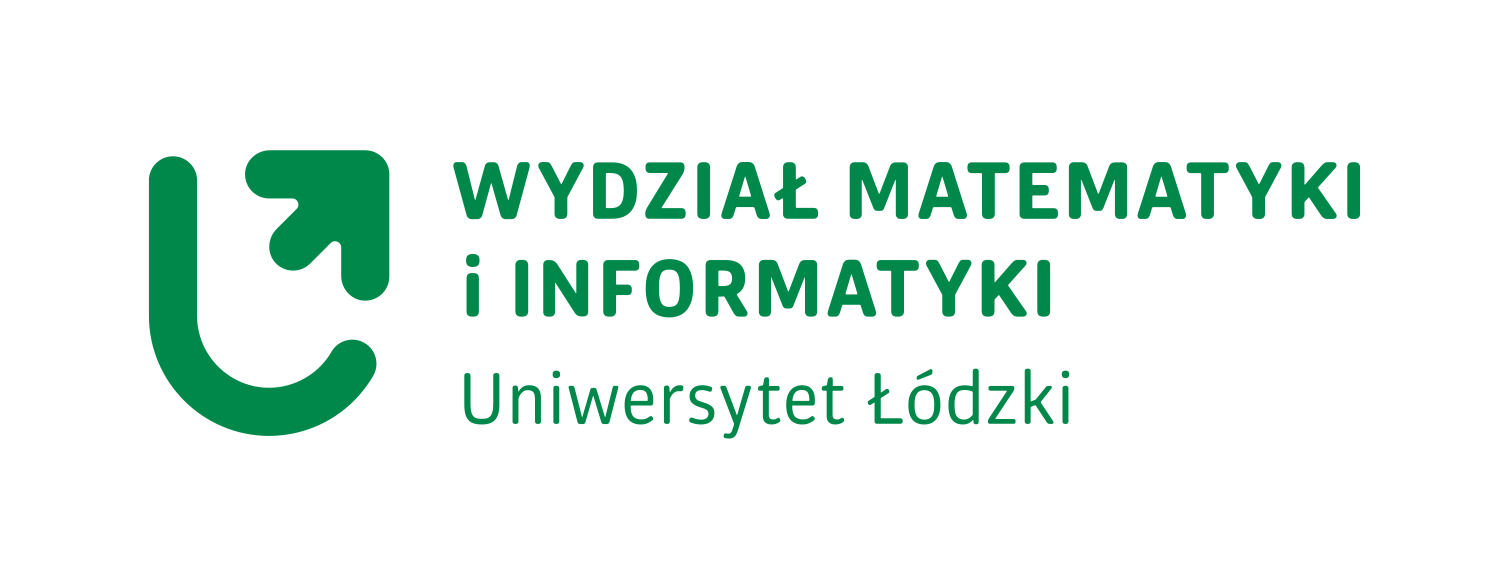

<center> Temat ćwiczenia: </center>
<center> Rekurencyjna sieć neuronowa </center>

Sprawozdanie z przedmiotu: **Zaawansowane Metody Eksploracji**
<br>Studia stacjonarne 2-go stopnia
<br>Kierunek: *Analiza danych, sem. 2*
<br>Prowadzący: *prof. dr hab. inż. Grzegorz Dudek*
<br> Data wykonania ćwiczenia: 29.05.2024, 05.06.2024
<br>Data złożenia sprawozdania 09.06.2024
<br> Wykonała: Kinga Lubecka
<br> Nr sekcji: **1.14**


#**A) Cel ćwiczenia**

Zapoznanie z rekurencyjną siecią neuronową oraz szeregiem czasowym. Zbudowanie modelu do prognozowania temperatury atmosferycznej na kolejną godzinę.

#**B) Treść zadania**

1. Zaimportuj niezbędne moduły.
2. Wczytaj dane.
3. Podaj podstawowe statystyki danych (df.describe().transpose()).
Wyznacz korelacje pomiędzy szeregami czasowymi.
Zwizualizuj powiązania pomiędzy szeregami (sns.pairplot).
Zwizualizuj wszystkie szeregi czasowe w całym zakresie czasowym (2009-2017) oraz w zakresie
obejmującym jeden dowolny miesiąc (patrz [*]).
4. Przygotuj dane – wytnij z oryginalnych danych 2 lata (zależnie od nr_gr). Przyjmij, że zbiór testowy stanowi
ostatni tydzień tego okresu, a zbiór treningowy pozostałą część. Ustal rozmiar okna wejściowego
(look_back) na 24 godz.
5. Dokonaj standaryzacji każdego szeregu w części treningowej i testowej (StandardScaler()).
Do dalszych analiz wybierz szereg czasowy temperatury atmosferycznej (train1 =
train[:,1].reshape(-1,1), test1 = test[:,1].reshape(-1,1)).
Model prognostyczny będzie się uczył prognozować temperaturę na chwilę t+1 na podstawie temperatur w
chwilach t-24, …, t (bez wykorzystania pozostałych zmiennych).
Zdefiniuj zbiory treningowy i testowy z wykorzystaniem funkcji create_dataset() (patrz wykład).
6.  Zbuduj model sieci RNN z jedną warstwą rekurencyjną LSTM. Skompiluj model. Przeprowadź uczenie
modelu.
Eksperymentalnie dobierz podstawowe hiperparametry: liczbę neuronów w LSTM, liczbę epok i rozmiar
batcha (możesz przyjąć domyśle wartości: 16, 30, 500).
Wyznacz błędy RMSE, MAE i ME (pamiętaj o destandaryzacji wyników).
Pokaż krzywą zbieżności (loss curve).
Pokaż wykresy oryginalnego szeregu i jego prognoz (część treningowa i testowa) w całym dwuletnim
zakresie czasowym oraz w zakresie obejmującym ostatnie dwa tygodnie, tj. ostatni tydzień treningowy i
tydzień testowy (na oddzielnym rysunku).
7. Czy dodanie dodatkowych zmiennych wejściowych (egzogenicznych) poprawi wyniki? Sprawdź to
eksperymentalnie, powtarzając p. 6.

#**C) Opis używanej w ćwiczeniu sieci neuronowej**

Rekurencyjne Sieci Neuronowe (RNN) to specjalny rodzaj sieci neuronowej, które wykorzystują swoje naturalne zdolności do przetwarzania danych sekwencyjnych. Cechą charakterystyczną tych sieci jest fakt, że posiadają pamięć, umożliwiającą im 'zapamiętanie' poprzednich informacji i wykorzystanie ich do przewidywania przyszłych danych. W RNN, neurony są połączone w tzw. pętle zwrotne, co umożliwia propagację informacji przez różne etapy sieci. Kiedy dochodzi do powtarzania się pewnego wzorca, sieć jest w stanie zauważyć te powtórzenia i nauczyć się z nich. W ten sposób RNN potrafi przewidzieć kolejne elementy ciągu na podstawie wcześniejszych, co jest kluczowym aspektem w wielu zastosowaniach, takich jak przetwarzanie języka naturalnego, rozpoznawanie mowy, czy analiza szeregów czasowych.RNN są nazywane rekurencyjnymi/powtarzającymi się,
ponieważ wykonują to samo zadanie dla każdego elementu sekwencji, a dane wyjściowe zależą od poprzednich obliczeń


Podstawowym komponentem RNN jest warstwa ukryta, która przetwarza informacje sekwencyjne, zachowując w pamięci stan z poprzednich kroków. To "pamiętanie" umożliwia sieci rozpoznawanie wzorców i zależności w danych sekwencyjnych. Architektura RNN może być jednokierunkowa lub dwukierunkowa, co umożliwia analizę sekwencji danych zarówno w przód, jak i wstecz, zapewniając głębsze zrozumienie kontekstu. Istotnym aspektem jest także mechanizm bramek, np. w Long Short-Term Memory (LSTM) i Gated Recurrent Units (GRU), który pomaga rozwiązać problem zanikającego gradientu, umożliwiając efektywne uczenie się na długich sekwencjach.

Long Short-Term Memory to ulepszona wersja rekurencyjnej sieci neuronowej zaprojektowanej przez Hochreitera & Schmidhubera.  
Tradycyjny RNN ma jeden ukryty stan, który jest przekazywany w czasie, co może utrudniać sieci nauczenie się długoterminowych zależności. Model LSTM rozwiązuje ten problem poprzez wprowadzenie komórki pamięci, która jest pojemnikiem mogącym przechowywać informacje przez dłuższy czas.  
Architektury LSTM potrafią uczyć się długoterminowych zależności w danych sekwencyjnych, co czyni je dobrze dostosowanymi do takich zadań, jak tłumaczenie języków, rozpoznawanie mowy i prognozowanie szeregów czasowych.

Architektura LSTM obejmuje komórkę pamięci kontrolowaną przez trzy bramki: bramkę wejściową, bramkę zapominania i bramkę wyjściową. Bramki te decydują, jakie informacje dodać, usunąć i wyprowadzić z komórki pamięci.  
Bramka wejściowa kontroluje, jakie informacje są dodawane do komórki pamięci.Bramka zapominania kontroluje, jakie informacje są usuwane z komórki pamięci.Bramka wyjściowa kontroluje, jakie informacje są wysyłane z komórki pamięci.  
Dzięki temu sieci LSTM mogą selektywnie zatrzymywać lub odrzucać informacje przepływające przez sieć, co pozwala im uczyć się długoterminowych zależności.  
LSTM utrzymuje stan ukryty, który działa jak pamięć krótkotrwała sieci. Stan ukryty jest aktualizowany w oparciu o dane wejściowe, poprzedni stan ukryty i bieżący stan komórki pamięci.

Architektura LSTM ma strukturę łańcuchową, która zawiera sieci neuronowe i różne bloki pamięci zwane komórkami. Informacje są przechowywane w komórkach, a manipulacją pamięcią zajmują się bramki. Są trzy bramki:
* Forget Gate - informacje, które nie są już przydatne w stanie komórki, są usuwane za pomocą bramki zapominania. Dwa wejścia $x_t$ (wejście w danym momencie) i $h_(t-_1)$ (wyjście poprzedniej komórki) są podawane do bramki i mnożone przez macierze wag, a następnie dodawane obciążenie. Wynik jest przepuszczany przez funkcję aktywacji, która daje wynik binarny. Jeżeli dla danego stanu komórki wyjście wynosi 0, informacja zostaje zapomniana, a dla wyjścia 1 informacja zostaje zachowana do wykorzystania w przyszłości.
* Input Gate - Dodanie przydatnych informacji do stanu komórki odbywa się za pomocą bramki wejściowej. Najpierw informacja jest regulowana za pomocą funkcji sigmoidy i filtruje wartości do zapamiętania podobnie jak w przypadku bramki zapominania za pomocą wejść $h_(t-_1)$ i $x_t$ . Następnie tworzony jest wektor za pomocą funkcji tanh, który daje wynik od -1 do +1, który zawiera wszystkie możliwe wartości z $h_(t-_1 )$ i $x_t$. Na koniec wartości wektora i wartości regulowane są mnożone w celu uzyskania użytecznych informacji.
* Output Gate - Zadanie wydobycia przydatnych informacji z bieżącego stanu komórki, które mają być prezentowane na wyjściu, realizowane jest przez bramkę wyjściową. Najpierw generowany jest wektor poprzez zastosowanie funkcji tanh do komórki. Następnie informacja jest regulowana za pomocą funkcji sigmoidalnej i filtrowana według wartości do zapamiętania za pomocą wejść​ $h_(t-_1)$ i $x_t$. Na koniec wartości wektora i wartości regulowane są mnożone i wysyłane jako dane wyjściowe i wejściowe do następnej komórki.

Szereg czasowy: uporządkowany zbiór wartości badanej cechy lub wartości
określonego zjawiska, zaobserwowanych w różnych momentach czasu.

#**D) Metodyka rozwiązania**

#Zad1

Importowanie potrzebnych bibliotek.

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Zad2

Wczytanie danych.

In [ ]:
zip_path = tf.keras.utils.get_file(
origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
fname='jena_climate_2009_2016.csv.zip',
extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6].reset_index(drop = True)
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
df.head()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
0     996.52     -8.02    265.40        -8.90    93.3          3.33   
6     996.50     -7.62    265.81        -8.30    94.8          3.44   
12    996.63     -8.85    264.57        -9.70    93.5          3.12   
18    996.87     -8.84    264.56        -9.69    93.5          3.13   
24    997.05     -9.23    264.15       -10.25    92.2          3.03   

    VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
0           3.11          0.22       1.94             3.12       1307.75   
6           3.26          0.18       2.04             3.27       1305.68   
12          2.92          0.20       1.82             2.93       1312.11   
18          2.92          0.20       1.83             2.93       1312.37   
24          2.79          0.24       1.74             2.80       1314.62   

    wv (m/s)  max. wv (m/s)  wd (deg)  
0       1.03           1.75     152.3  
6       0.18           0.63     166.5  
12      0.16           0.50     158.3  
18      0.07           0.25     129.3  
24      0.10           0.38     203.9

#Zad3

Podstawowe statystyki danych.

In [ ]:
df.describe().transpose()

count         mean        std      min      25%      50%  \
p (mbar)         70091.0   989.212842   8.358886   913.60   984.20   989.57   
T (degC)         70091.0     9.450482   8.423384   -22.76     3.35     9.41   
Tpot (K)         70091.0   283.493086   8.504424   250.85   277.44   283.46   
Tdew (degC)      70091.0     4.956471   6.730081   -24.80     0.24     5.21   
rh (%)           70091.0    76.009788  16.474920    13.88    65.21    79.30   
VPmax (mbar)     70091.0    13.576576   7.739883     0.97     7.77    11.82   
VPact (mbar)     70091.0     9.533968   4.183658     0.81     6.22     8.86   
VPdef (mbar)     70091.0     4.042536   4.898549     0.00     0.87     2.19   
sh (g/kg)        70091.0     6.022560   2.655812     0.51     3.92     5.59   
H2OC (mmol/mol)  70091.0     9.640437   4.234862     0.81     6.29     8.96   
rho (g/m**3)     70091.0  1216.061232  39.974263  1059.45  1187.47  1213.80   
wv (m/s)         70091.0     1.702567  65.447512 -9999.00     0.99     1.76   
max. wv (m/s)    70091.0     2.963041  75.597657 -9999.00     1.76     2.98   
wd (deg)         70091.0   174.789095  86.619431     0.00   125.30   198.10   

                      75%      max  
p (mbar)          994.720  1015.29  
T (degC)           15.480    37.28  
Tpot (K)          289.530   311.21  
Tdew (degC)        10.080    23.06  
rh (%)             89.400   100.00  
VPmax (mbar)       17.610    63.77  
VPact (mbar)       12.360    28.25  
VPdef (mbar)        5.300    46.01  
sh (g/kg)           7.800    18.07  
H2OC (mmol/mol)    12.490    28.74  
rho (g/m**3)     1242.765  1393.54  
wv (m/s)            2.860    14.01  
max. wv (m/s)       4.740    23.50  
wd (deg)          234.000   360.00

Podejrzaną watrtością wydaje się być minimalna prędkość wiatru (wv(m/s)), która wynosi -9999.00. Najprawdopodobniej jest to wartość błędna. Z tegi powodu zamienię wartości na 0.

In [ ]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0


Korelacje między szeregami czasowymi.

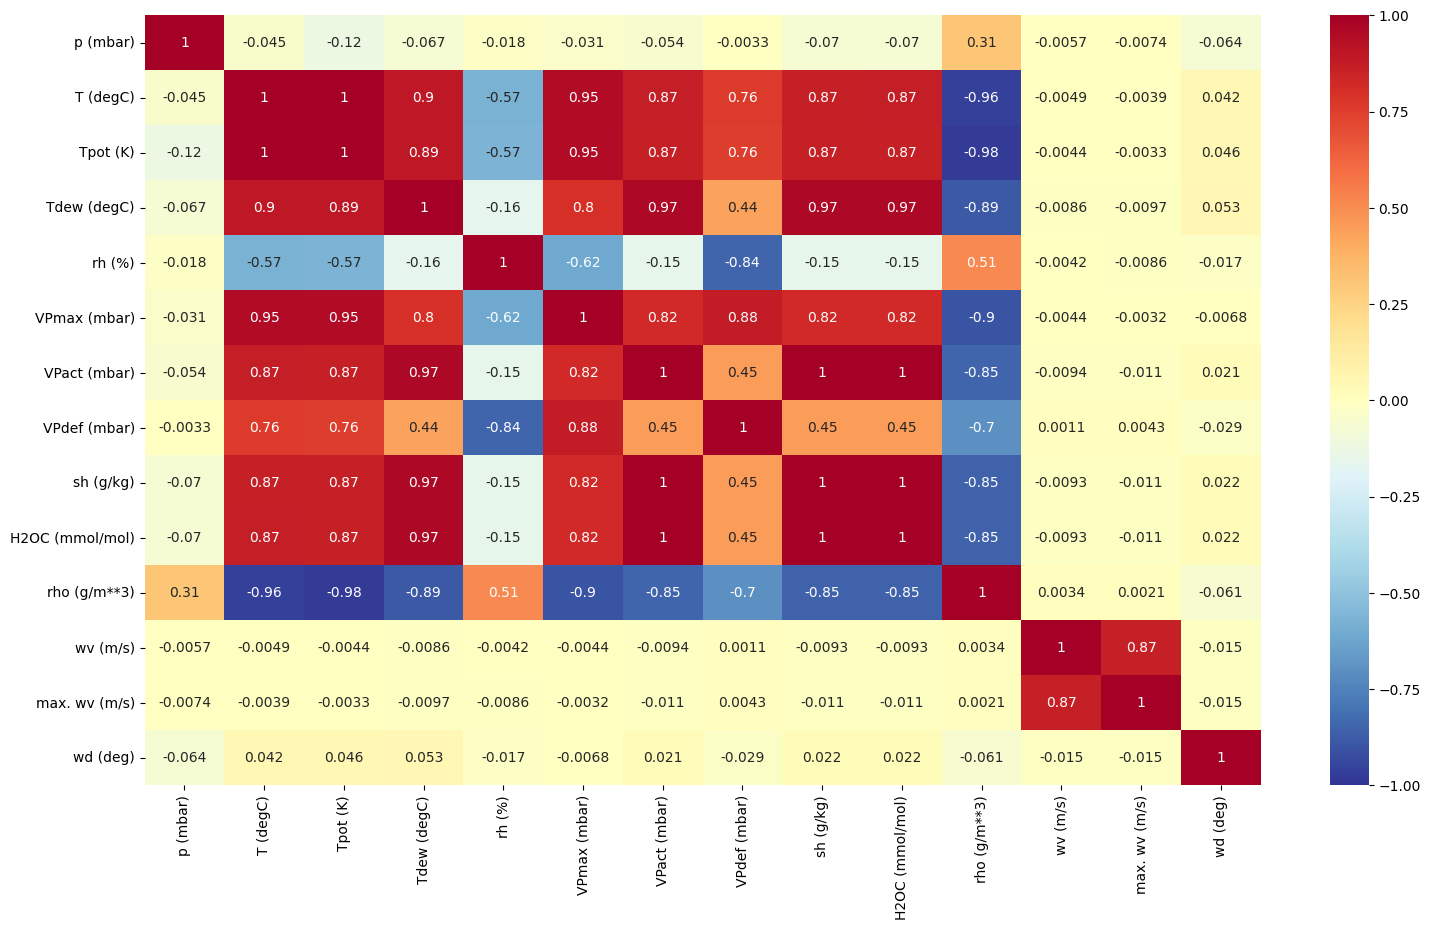

In [ ]:
corr = df.corr()
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(corr, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1,)

Bardziej wyrazistymi kolorami można zauważyć dość sporo silnych  korelacji dodatnich oraz ujemnych.
Np. H2)C (mmol/mol) z sh (g/kg)- ich korelacja wynosi aż 1. W tym wypadku mniej jest przypadków z bardzo małą korelacją, jak np dla wd (deg) wraz z VPmax (mbar).

Generalnie może to oznaczać wiele rzeczy, jak np. sugestia istnienia wyraźnych relacji między zmiennymi, czy nadmiar informaji (redundancja), jednakże w tym przypadku silne korelacje mogą wynikać po prostu z naturalnych zależności, gdy do czynienia mamy z sezonowymi wzorcami pogodowymi.

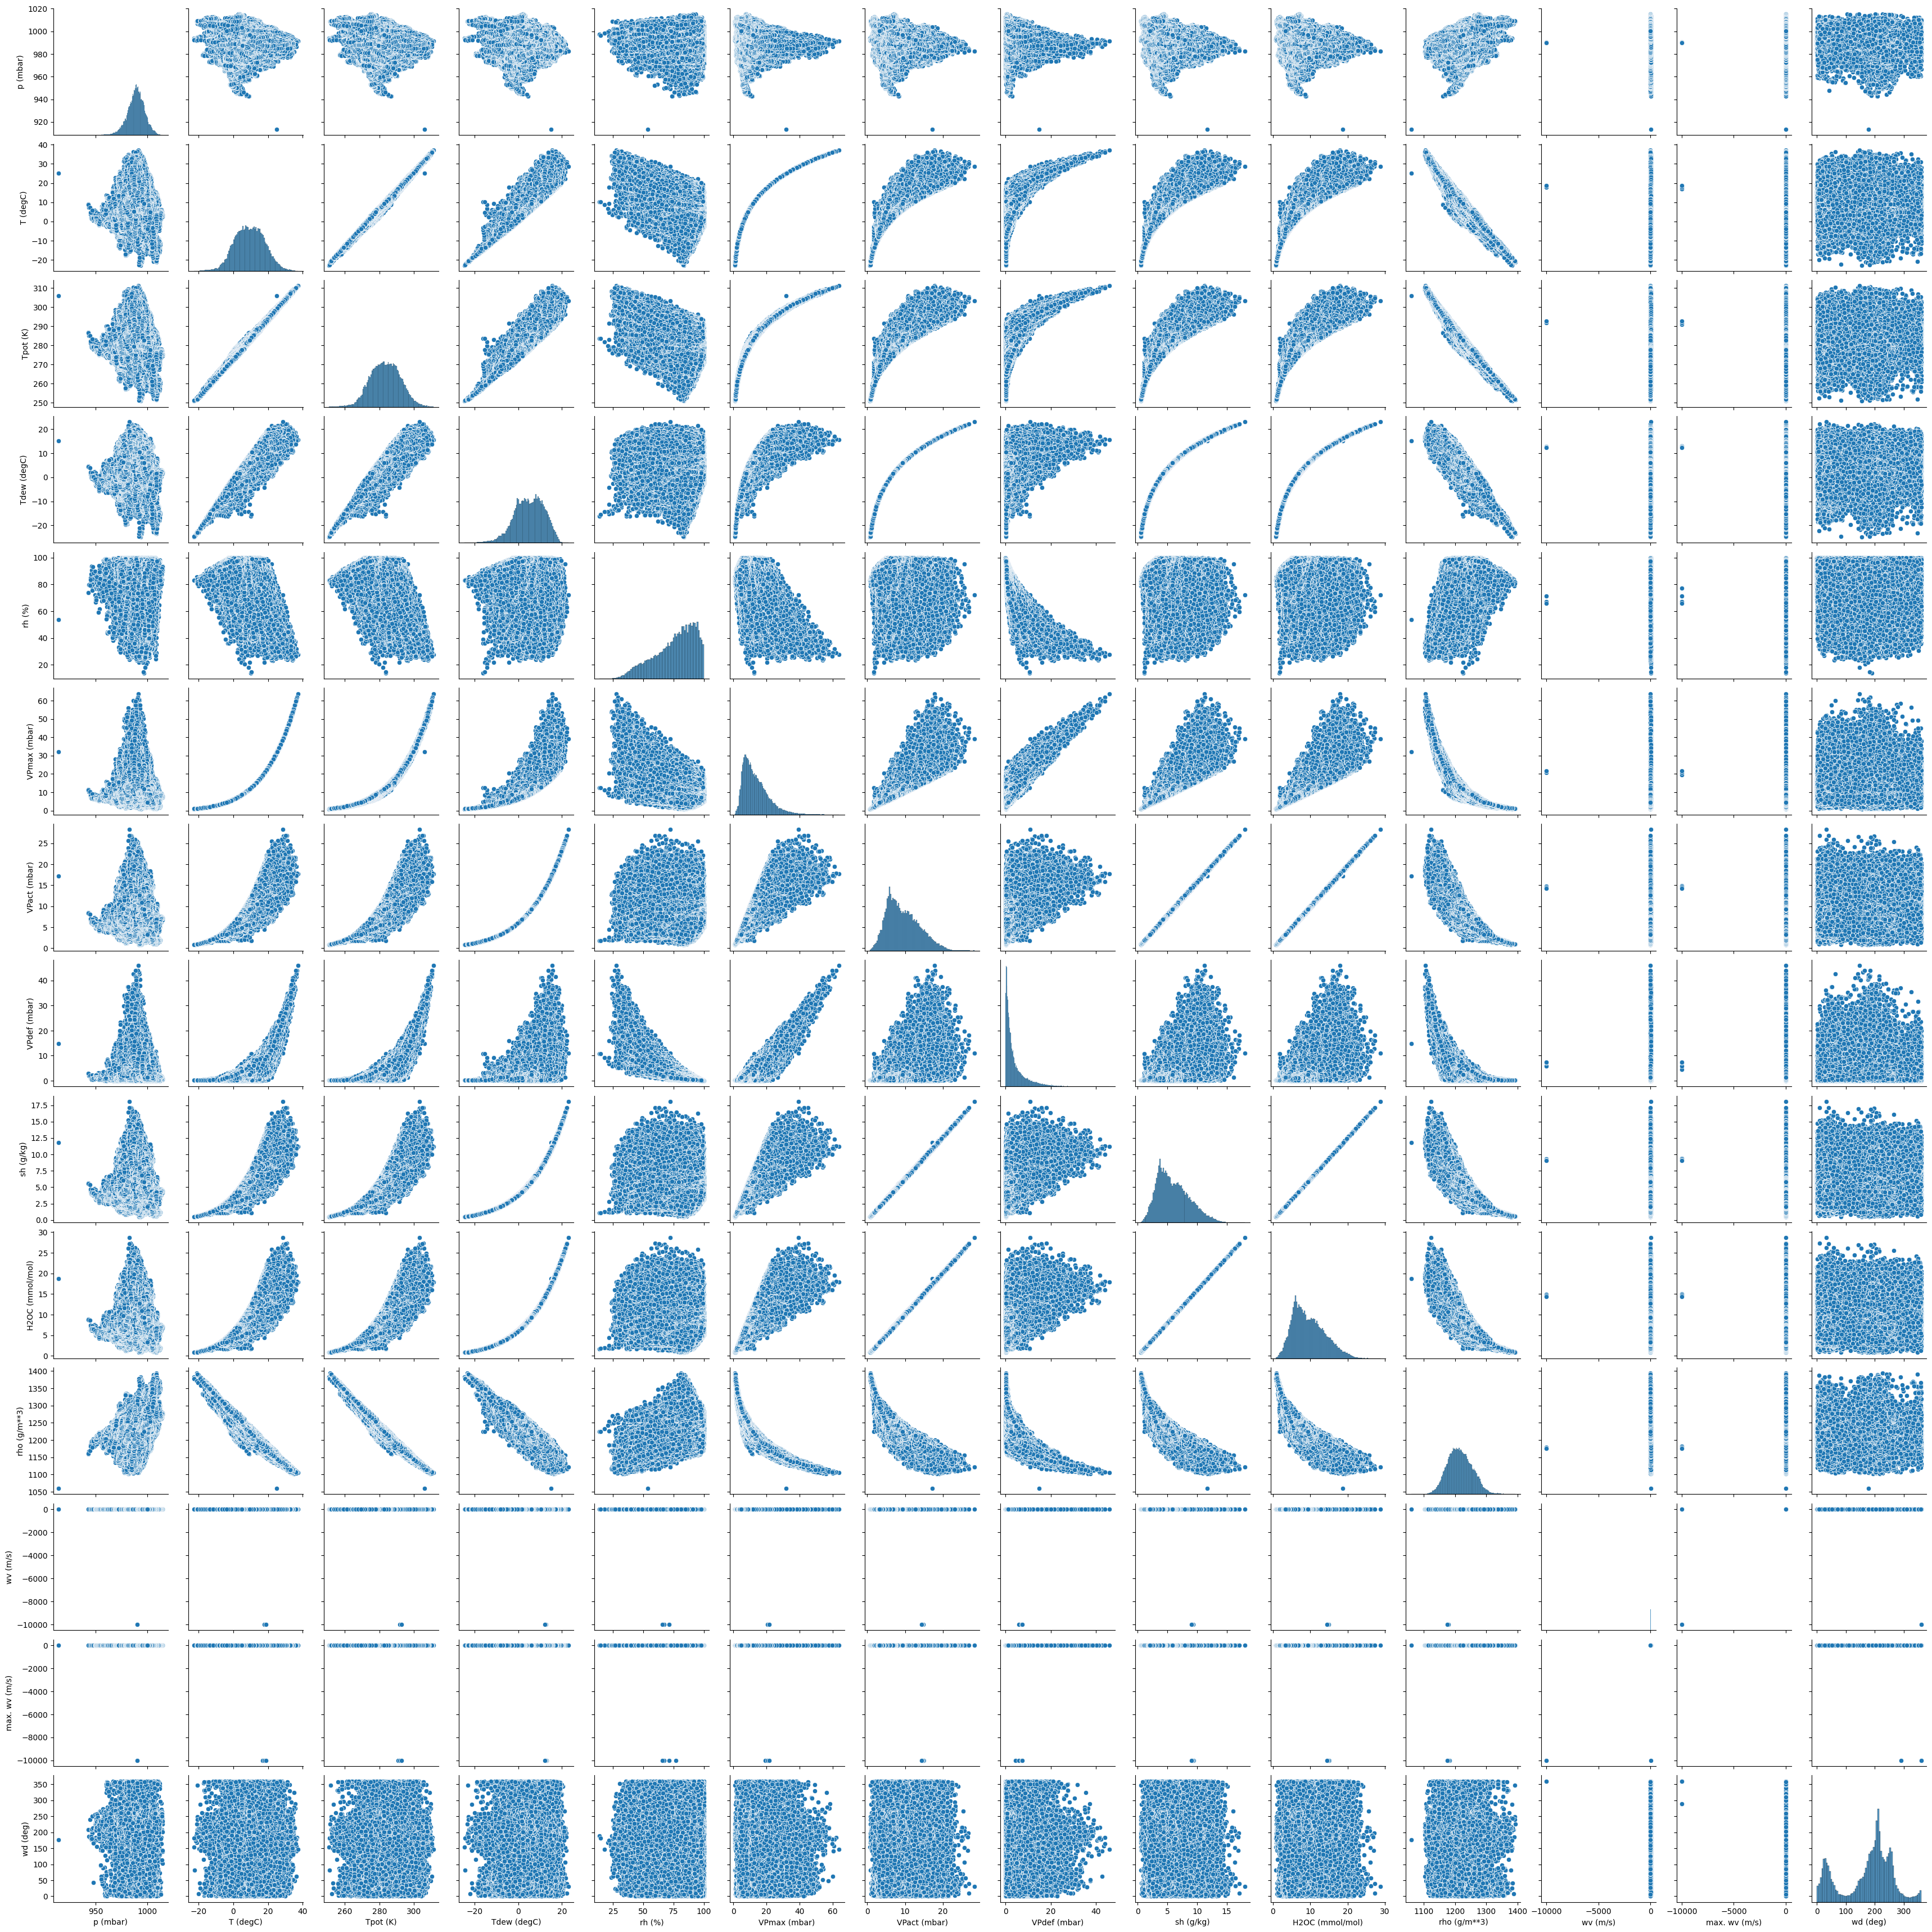

In [ ]:
sns.pairplot(df)

Podobnie jak wyżej, możemy upewnić się co do związków między zmiennymi. Widoczne są konkretne wzorce i kształty, które wskazują wyraźnie na poszczególne rodzaje korelacji. Szczególnie widoczne są idealne proste linie układające się wzdłóż prostej y=x, co oznacza wskazuje na idealną korelację (w zależności od znaku czy dodatnią czy ujemną).

Na przekątnej wykresu znajdują się histogramy lub wykresy gęstości dla poszczególnych zmiennych pokazujące ich rozkład. Histogramy z symetrycznym kształtem sugerują, że zmienna ma rozkład normalny lub zbliżony do niego.
Histogram z wątkim i wysokim szczytem oraz długim ogonem wskazuje na większą koncentrację wokół średniej oraz większą liczbę wartości ekstremalnych.
Histogram z więcej niż jednym szczytem sugeruje, że zmienna może mieć kilka dominujących zestawów wartości, co może wskazywać na obecność różnych podgrup w danych.

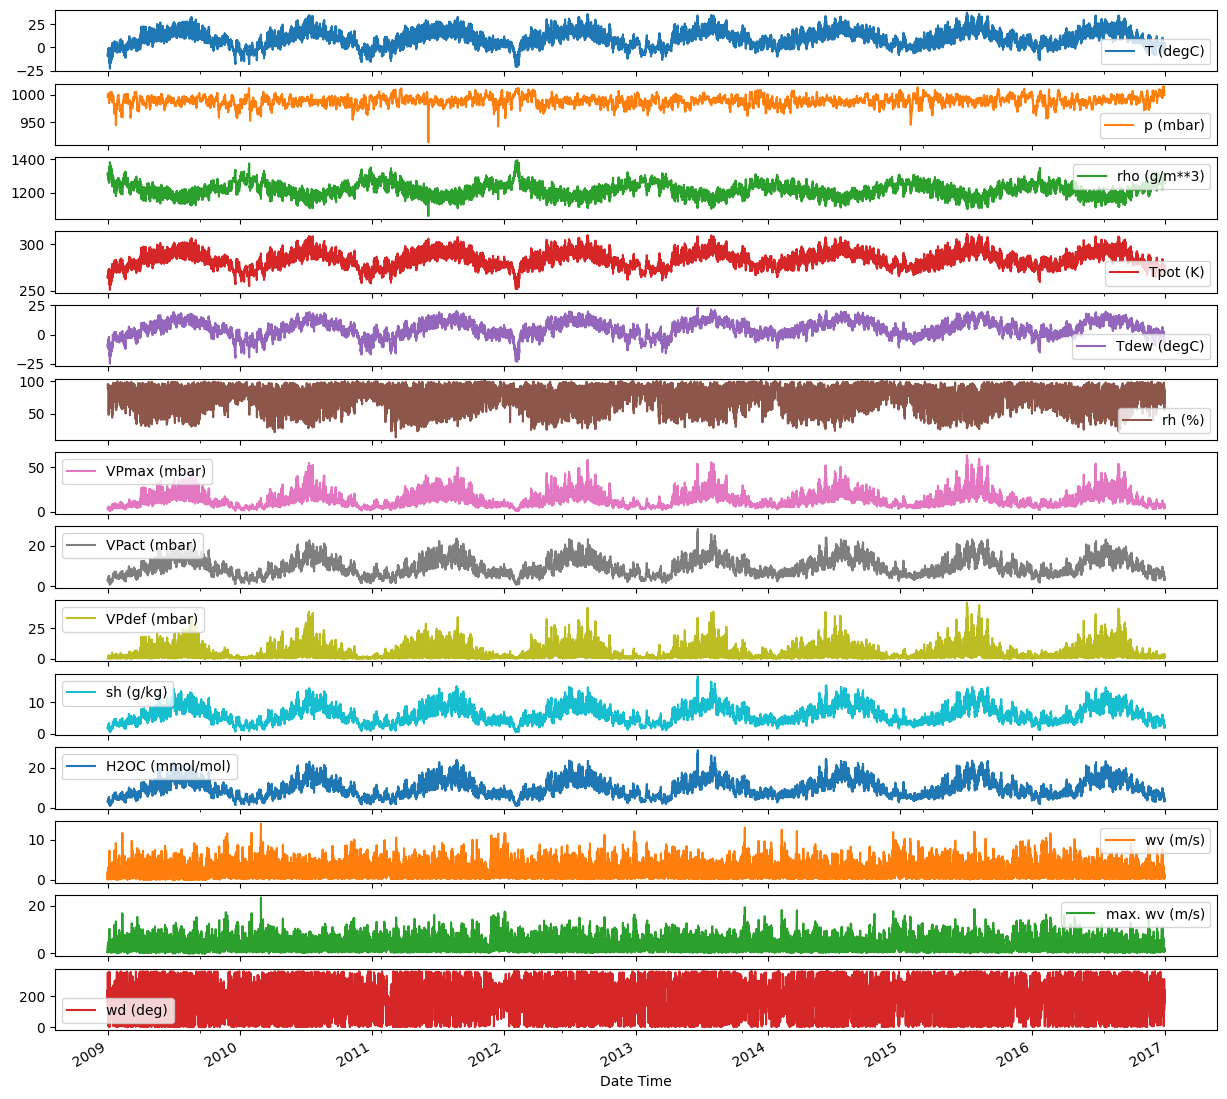

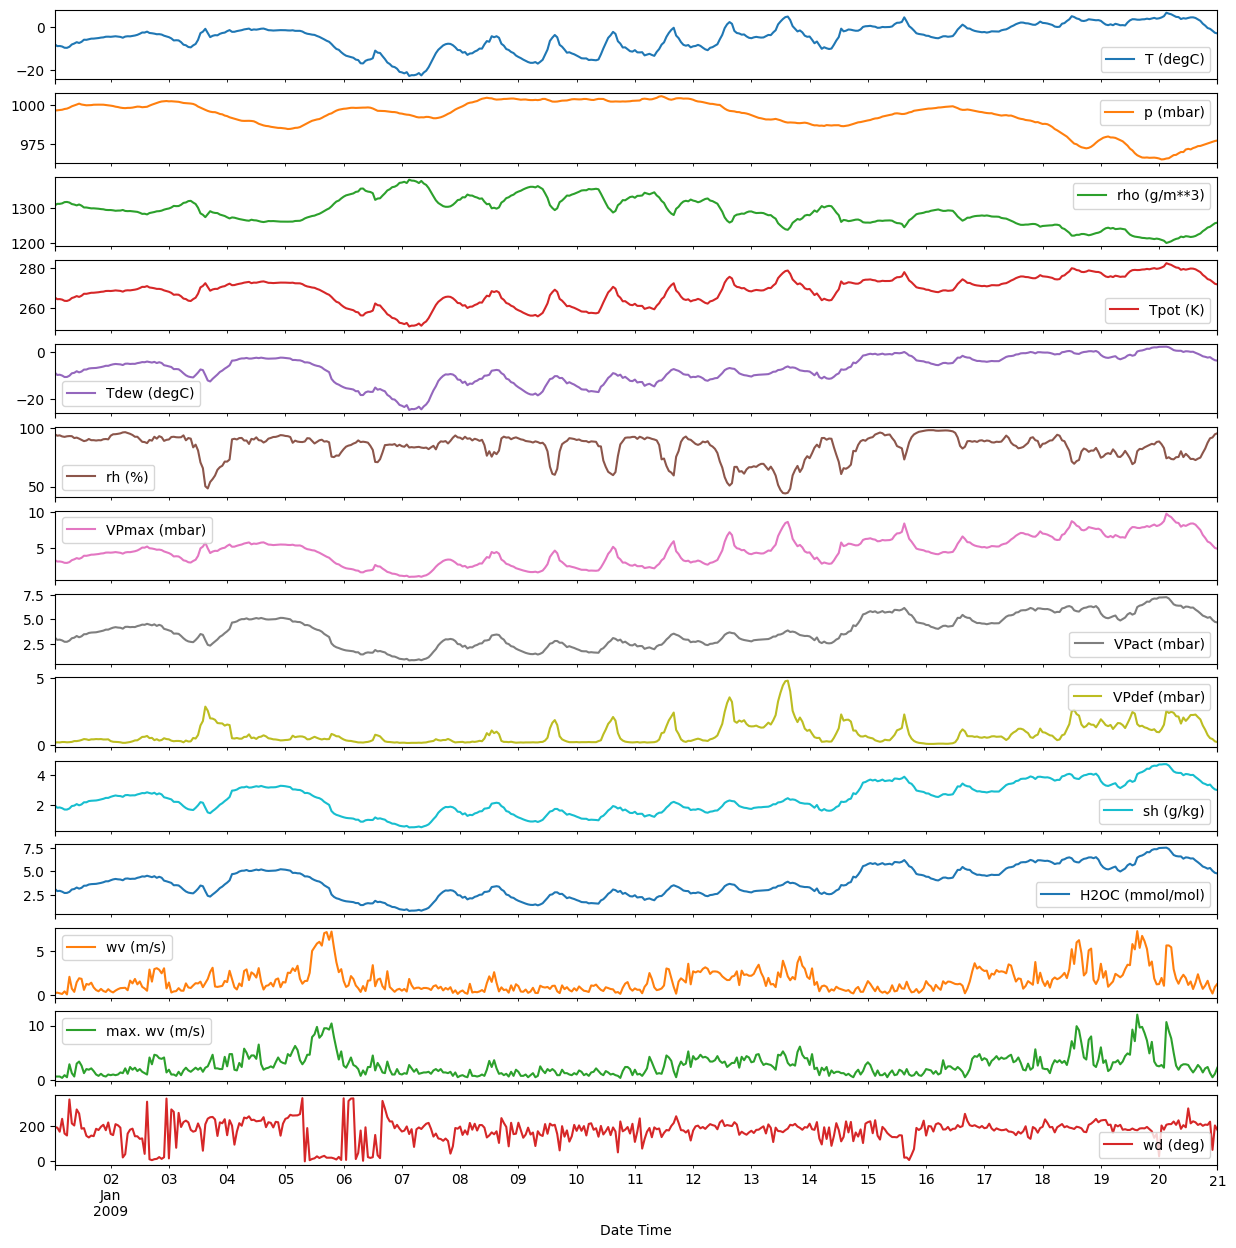

In [ ]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)','VPmax (mbar)','VPact (mbar)','VPdef (mbar)','sh (g/kg)','H2OC (mmol/mol)','wv (m/s)','max. wv (m/s)','wd (deg)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize = (15,15))

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True, figsize = (15,15))


Pierwszy zestaw generuje wykresy szeregów czasowych dla wszystkich kolumn danych. Każda kolumna uwzględniona jest na osobnym podwykresie, dzięki czemu można analizować każdą zmienną z osobna.
Drugi fragment kodu generuje wyresy, ale tylko dla pierwszych 480 próbek, co oznacza że mamy pogląd na bardziej szczegółowy widok na wybrany fragment czasowy.

Wykresy czasowe mogą ukazać długoterminiowe trendy, takie jak np. wzrost czy spadek temperatury. Na wykresach na pewno można zauważyć zachowania sezonowe, co raczej nie dziwi, gdyż wiadomo, że latem temperatura będzie wyższa niż zimą.
Można również analizować, czy i jak zmiany jednej zmiennej wpływają na zmiany drugiej zmiennej, czyli ocenić czy istnieje jakaś zależność między konkretnymi danymi.

#Zad4

Przygotowanie danych.

In [ ]:
nr_gr = 1.14
start = int(nr_gr*300*24)
end = int(start + 730*24)
df = df[start:end]
look_back = 24
test_size = 7*24
train_size = (end-start) - test_size
train = df[:train_size]
test = df[train_size:]

#Zad5

Standaryzacja każdego szeregu czasowego w części treningowej i testowej.

In [ ]:
sc = StandardScaler()
scaler = sc.fit(train)
train_sc = scaler.transform(train)
test_sc = scaler.transform(test)

Do dalszej analizy został wybrany szereg czasowy temperatury atmosferycznej.

In [ ]:
train1 = train_sc[:,1].reshape(-1,1)
test1 = test_sc[:,1].reshape(-1,1)

Funkcja do tworzenia zestawu danych.

Funkcja tworzy zestaw danych do trenowania modelu, który na podstawie poprzednich wartości (X) przewiduje kolejną wartość (Y) w szeregu czasowym.

In [ ]:
def create_dataset(dataset, look_back=1): #lock_back- liczba wcześniejszych punktów czasowych, ktore beda uzywane do przewidzenia nastepnego
  dataX, dataY = [], []    #X- wektor cech (część szeregu czasowego), Y- wartość docelowa(następna wartość w szeregu)
  for i in range(len(dataset)-look_back):
    a = dataset[i:(i+look_back), 0]   #pobiera fragment szeregu od i do i+look_back, biorąc tylko pierwszą kolumnę. Powstaje wektor dlugosci look_back
    dataX.append(a)  #
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

Konwersja szeregów czasowych na macierze danych.

In [ ]:
train_test = np.concatenate((train1,test1), axis=0)
trainX, trainY = create_dataset(train1, look_back) #trainY zawiera wartosci, ktore model ma przewidywać, czyli kolejną próbkę po look_back
train_testX, train_testY = create_dataset(train_test, look_back)
testX = train_testX[-test_size:]
testY = train_testY[-test_size:]

trainX, trainY zawierają dane treningowe, utworzone z train1 z użyciem funkcji create_dataset, tak samo jak train_testX i train_testY.

testX i testY wybierają odpowiednią liczbę próbek (168) z końca train_testX i train_testY, aby utworzyć ostateczny zbiór testowy.

Zmiana kształtu danych do formatu oczekiwanego przez model.

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))
#testX.shape[0] to liczba próbek testowych, test.shape[1] to liczba kroków czasowych (24h), 1 oznacza,że każda próbka będzie miała jedną cechę.

Modele oczekują danych w określonym formacie. W przypadku sieci rekurenycjnych format to trójwymiarowy tensor, gdzie:
* pierwsza oś odpowiada liczbie próbek,
* druga oś odpowiada liczbie kroków czasowych,
* trzeci wymiar odpowiada liczbie cech w każdym kroku
Przekształcenie danych jest konieczne, aby mogły być one używane jako dane wejściowe do modelu szeregów czasowych.

Wartości te zwykle zapisywane są w macierzach.

#Zad6

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(16, input_shape=(look_back,1)))
model.add(Dense(1))  #dodaje warstwę gęstą(w pełni połączoną ) z jednym neuronem na wyjściu, który będzie przewidywał wartość docelową

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=20, batch_size=100)

Epoch 1/20
174/174 [==============================] - 5s 16ms/step - loss: 0.2509
Epoch 2/20
174/174 [==============================] - 3s 17ms/step - loss: 0.0650
Epoch 3/20
174/174 [==============================] - 2s 12ms/step - loss: 0.0211
Epoch 4/20
174/174 [==============================] - 2s 12ms/step - loss: 0.0137
Epoch 5/20
174/174 [==============================] - 2s 12ms/step - loss: 0.0114
Epoch 6/20
174/174 [==============================] - 2s 12ms/step - loss: 0.0104
Epoch 7/20
174/174 [==============================] - 3s 15ms/step - loss: 0.0097
Epoch 8/20
174/174 [==============================] - 3s 18ms/step - loss: 0.0093
Epoch 9/20
174/174 [==============================] - 2s 12ms/step - loss: 0.0089
Epoch 10/20
174/174 [==============================] - 2s 12ms/step - loss: 0.0086
Epoch 11/20
174/174 [==============================] - 2s 12ms/step - loss: 0.0083
Epoch 12/20
174/174 [==============================] - 2s 12ms/step - loss: 0.0081
Epoch 13/20
1

In [ ]:
model = Sequential()
model.add(LSTM(16, input_shape=(look_back,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=50, batch_size=200)

Epoch 1/50
87/87 [==============================] - 4s 15ms/step - loss: 0.3045
Epoch 2/50
87/87 [==============================] - 1s 15ms/step - loss: 0.1258
Epoch 3/50
87/87 [==============================] - 1s 15ms/step - loss: 0.0805
Epoch 4/50
87/87 [==============================] - 1s 15ms/step - loss: 0.0500
Epoch 5/50
87/87 [==============================] - 1s 15ms/step - loss: 0.0308
Epoch 6/50
87/87 [==============================] - 1s 15ms/step - loss: 0.0203
Epoch 7/50
87/87 [==============================] - 2s 20ms/step - loss: 0.0155
Epoch 8/50
87/87 [==============================] - 2s 25ms/step - loss: 0.0133
Epoch 9/50
87/87 [==============================] - 1s 15ms/step - loss: 0.0120
Epoch 10/50
87/87 [==============================] - 1s 14ms/step - loss: 0.0110
Epoch 11/50
87/87 [==============================] - 1s 14ms/step - loss: 0.0103
Epoch 12/50
87/87 [==============================] - 1s 14ms/step - loss: 0.0098
Epoch 13/50
87/87 [==================

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(look_back,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=20, batch_size=150)

Epoch 1/20
116/116 [==============================] - 5s 19ms/step - loss: 0.1783
Epoch 2/20
116/116 [==============================] - 2s 19ms/step - loss: 0.0357
Epoch 3/20
116/116 [==============================] - 2s 19ms/step - loss: 0.0164
Epoch 4/20
116/116 [==============================] - 2s 19ms/step - loss: 0.0129
Epoch 5/20
116/116 [==============================] - 3s 24ms/step - loss: 0.0116
Epoch 6/20
116/116 [==============================] - 3s 26ms/step - loss: 0.0102
Epoch 7/20
116/116 [==============================] - 2s 19ms/step - loss: 0.0096
Epoch 8/20
116/116 [==============================] - 2s 19ms/step - loss: 0.0090
Epoch 9/20
116/116 [==============================] - 2s 19ms/step - loss: 0.0090
Epoch 10/20
116/116 [==============================] - 2s 19ms/step - loss: 0.0083
Epoch 11/20
116/116 [==============================] - 4s 31ms/step - loss: 0.0081
Epoch 12/20
116/116 [==============================] - 3s 22ms/step - loss: 0.0080
Epoch 13/20
1

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(look_back,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=20, batch_size=128)

Epoch 1/20
136/136 [==============================] - 7s 37ms/step - loss: 0.1902
Epoch 2/20
136/136 [==============================] - 6s 46ms/step - loss: 0.0309
Epoch 3/20
136/136 [==============================] - 5s 34ms/step - loss: 0.0153
Epoch 4/20
136/136 [==============================] - 6s 48ms/step - loss: 0.0117
Epoch 5/20
136/136 [==============================] - 5s 35ms/step - loss: 0.0102
Epoch 6/20
136/136 [==============================] - 5s 33ms/step - loss: 0.0094
Epoch 7/20
136/136 [==============================] - 7s 48ms/step - loss: 0.0086
Epoch 8/20
136/136 [==============================] - 5s 34ms/step - loss: 0.0083
Epoch 9/20
136/136 [==============================] - 5s 39ms/step - loss: 0.0081
Epoch 10/20
136/136 [==============================] - 6s 45ms/step - loss: 0.0081
Epoch 11/20
136/136 [==============================] - 5s 34ms/step - loss: 0.0076
Epoch 12/20
136/136 [==============================] - 7s 49ms/step - loss: 0.0076
Epoch 13/20
1

Hiperparametry:
* num_neurons - liczba neuronów w warstwie LSTM,
* num_epoch - liczba epok, czyli przejść przez cały zbiór danych podczas uczenia,
* batch_size - rozmiar batcha, czyli liczba próbek używanych do jednej aktualizacji wag modelu

Predykcja:

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

6/6 [==============================] - 0s 6ms/step


Destandaryzacja wyników:

In [ ]:
# Stworzenie pełnych macierzy z zerami w oryginalnym ksztaltem(przed normalizacja)
trainPredict_full = np.zeros((trainPredict.shape[0], train.shape[1]))
testPredict_full = np.zeros((testPredict.shape[0], test.shape[1]))
trainY_full = np.zeros((trainY.shape[0], train.shape[1]))
testY_full = np.zeros((testY.shape[0], test.shape[1]))


#przypisanie przewidywanych i rzeczywistych wartości do pierwszej kolumny tych macierzy
trainPredict_full[:, 1] = trainPredict.flatten()
testPredict_full[:, 1] = testPredict.flatten()
trainY_full[:, 1] = trainY.flatten()
testY_full[:, 1] = testY.flatten()
#macierze zostaja przeksztalcone z dwuwymiarowej maceirzy na wektor i przypisane do pierwszej kolumny

# Odwrócenie normalizacji dla pelnej macierzy
trainPredict_inv = scaler.inverse_transform(trainPredict_full)[:, 1].flatten()
testPredict_inv = scaler.inverse_transform(testPredict_full)[:, 1].flatten()
trainY_inv = scaler.inverse_transform(trainY_full)[:, 1].flatten()
testY_inv = scaler.inverse_transform(testY_full)[:, 1].flatten()



Teraz wartości rzeczywiste i przewidywane są jednowymiarowymi wektorami oraz oryginalnej skali.

In [ ]:
trainScore_rmse = np.sqrt(mean_squared_error(trainY_inv, trainPredict_inv))
print('Train Score: %.2f RMSE' % (trainScore_rmse))
testScore_rmse = np.sqrt(mean_squared_error(testY_inv, testPredict_inv))
print('Test Score: %.2f RMSE' % (testScore_rmse))

trainScore_mae = mean_absolute_error(trainY_inv, trainPredict_inv)
print('Train Score: %.2f MAE' % (trainScore_mae))
testScore_mae = mean_absolute_error(testY_inv, testPredict_inv)
print('Test Score: %.2f MAE' % (testScore_mae))

trainScore_me = np.mean(trainY_inv - trainPredict_inv)
print('Train Score: %.2f ME' % (trainScore_me))
testScore_me = np.mean(testY_inv - testPredict_inv)
print('Test Score: %.2f ME' % (testScore_me))

Train Score: 0.77 RMSE
Test Score: 0.84 RMSE
Train Score: 0.53 MAE
Test Score: 0.54 MAE
Train Score: -0.15 ME
Test Score: -0.16 ME


Błędy średniokwadratowe mierzą średnią oczekiwaną różnicę między wartością przewidywaną a rzeczywistą. Im mniejsza wartość, tym lepszy model.
Wartość 0.77 dla zbioru treningowego i 0.84 dla testowego sygeruje, że model dobrze dopasowuje się do danych. Wartość dla zbioru testowego jest trochę wyższa, co może oznaczać, że model trochę gorzej generalizuje nowe dane.

Wartości bezwzględne błędów(MAE) obliczają moduły różnic między rzeczywistymi a przewidywanymi wartościami. Ponownie im mniejsza wartość, tym lepiej. Wartości dla obu zbiorów sugerują, że model ma niskie odchylenie średnie od rzeczywistych wartości.Model przewiduje temperaturę z błędem średnio 0.53-0.54 stopni.


Średni błąd mierzy średnią różnicę między rzeczywistymi a przewidywanymi wartościami. Wartość ME zbliżona do zera, oznacza, że model jest doprze dopasowany. W przypadku gdy, ME jest dodatnie model zazwyczaj przeszacowuje dane, w przeciwnym wypadku, gdy model ME jest ujemny to niedoszacowuje danych. W tym modelu prognozowane temperatury są średnio o 0.15-0.16 stopni niższe niż rzeczywiste temperatury.

Podsumowując, model wydaje się dobrze radzić z dopasowaniem do danych treningowych.


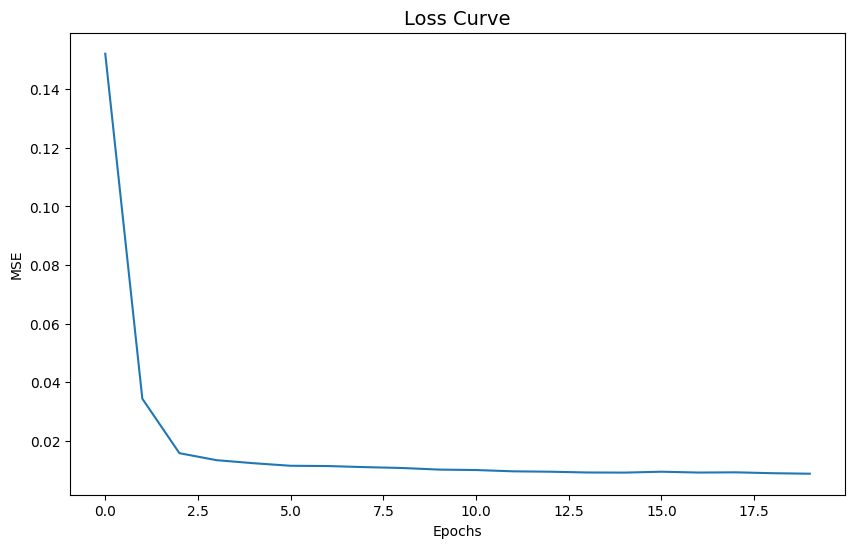

In [ ]:
plt.figure(figsize= (10,6))
plt.plot(history.history['loss'], label='MSE')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

Dzięki krzywej straty, możemy analizować jak zmienia się wartość funkcji straty w kolejnych epokach. Najlepiej, gdyby krzywa malała wraz z postępem w trenowaniu, gdyż oznacza to, że model uczy się lepiej dopasowywać do danych. Na tym wykresie widać, że największy spadek ma miejsce do drugiej epoki, dalej tylko odrobinę spada. Może na to mieć wpływ np. wytrenowanie już modelu, overfitting.

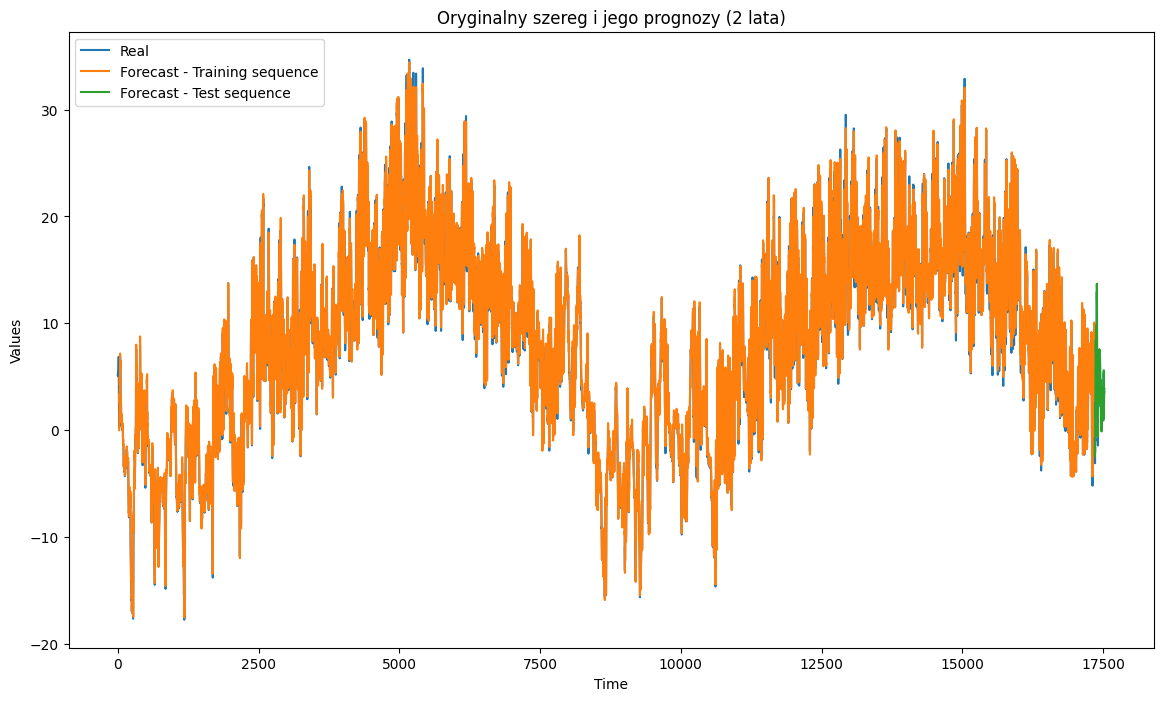

In [ ]:
full_data_inv = np.concatenate((train, test), axis=0)   #laczenie danych treningowych i testowych

plt.figure(figsize=(14, 8))
plt.plot(full_data_inv[:, 1], label='Real')    #oryginalny szereg
plt.plot(range(look_back, look_back + len(trainPredict_inv)), trainPredict_inv, label='Forecast - Training sequence')
#trainPredict_inv zawiera prognozy modelu dla danych treningowych, a range(look_back, look_back + len(trainPredict_inv)) generuje zakres indeksów odpowiadających prognozom dla danych treningowych
plt.plot(range(len(full_data_inv) - test_size, len(full_data_inv)), testPredict_inv, label='Forecast - Test sequence')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Oryginalny szereg i jego prognozy (2 lata)')
plt.legend()
plt.show()

Powyższy wykres przedstawia oryginalny szereg czasowy wraz z jego prognozami dla danych treningowych i testowych na dwa lata.
Na wykresie widać, że prognozy prawie pokrywają się z rzeczywistymi wartościami, co oznacza, że model dobrze generalizuje i jest w stanie przewidzieć przyszłe wartości na podstawie poprzedzających.

Text(0.5, 1.0, 'Original Series and Predictions (Last Two Weeks)')

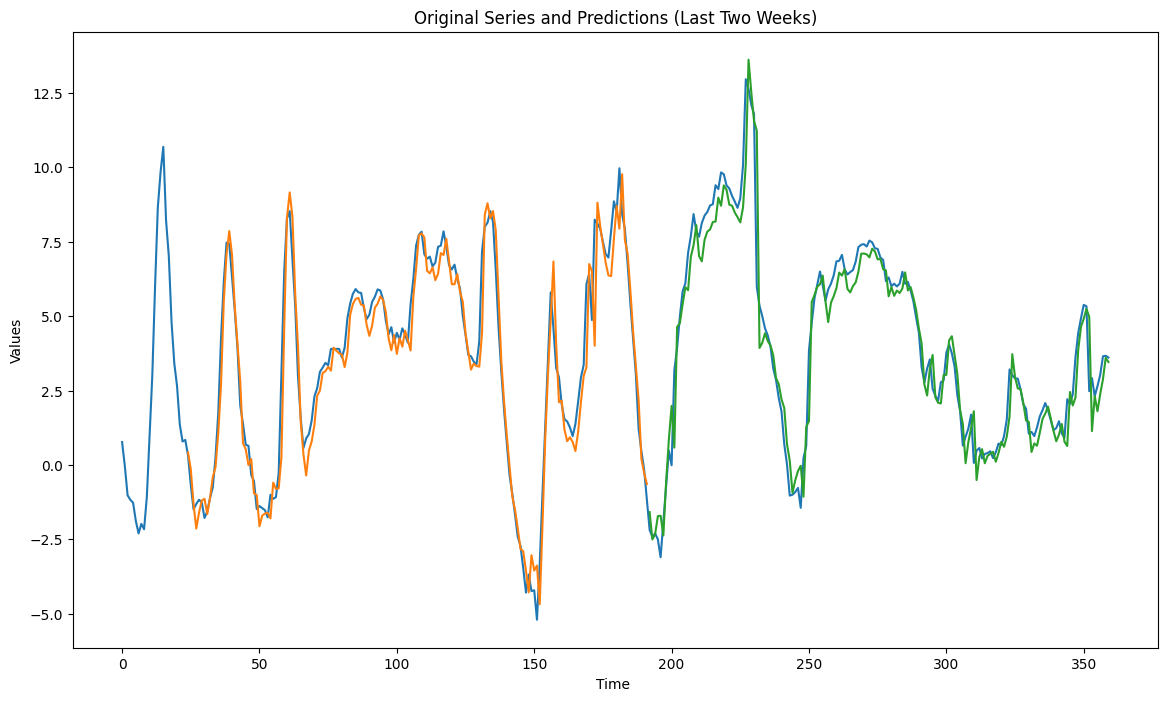

In [ ]:
last_two_weeks = np.concatenate((train[-look_back - test_size:], test[-test_size:]), axis=0)
#wybiera ostatni fragment z zestawu treningowego który obejmuje look_back + test_size kroków czasowych wstecz

plt.figure(figsize=(14, 8))
plt.plot(last_two_weeks[:, 1], label='Real')  #oryginalny szereg z 2tyg
plt.plot(range(look_back, look_back + len(trainPredict_inv[-test_size:])), trainPredict_inv[-test_size:], label='Train Predict')
#trainPredict_inv[-test_size:] zawiera prognozy modelu dla danych treningowych w ostatnich dwóch tygodniach, a reszta generuje zakres indeksów odpowiadających tym prognozom
plt.plot(range(len(last_two_weeks) - test_size, len(last_two_weeks)), testPredict_inv, label='Test Predict')
#testPredict_inv zawiera prognozy modelu dla danych testowych, a reszta generuje zakres indeksów odpowiadających prognozom dla ostatnich dwóch tygodni
plt.xlabel('Time ')
plt.ylabel('Values')
plt.title('Real and Predictions (Last Two Weeks)')


Wykres przedstawia oryginalny szereg czasowy wraz z jego prognozami na najbliższe dwa tygodnie.
Patrząc na tej wykres można zauważyć, że model całkiem dobrze radzi sobie z prognozą. Widoczne są małe odchyły, gdy temperatura zmienia się o małe wartości, w przypadku dużych zmian model radzi sobie lepiej. Całość wygląda dobrze.

#Zad7

Rozszerzenie danych wejściowych o ciśnienie atmosferyczne *p (mbar)* oraz gęstość powietrza *rho *(g/m**3)  .

In [ ]:
#wybor kolumn i przeksztalcenie na macierze, ksztalt ulegl zmianie na kolumnowy wektor
t = df['T (degC)'].values.reshape(-1, 1)
p = df['p (mbar)'].values.reshape(-1, 1)
rho= df['rho (g/m**3)'].values.reshape(-1, 1)
look_back = 24
test_size = 7*24
train_size = (end-start) - test_size

#podzial na zbior treningowy i testowy
train_t = t[:train_size]
test_t = t[train_size:]
train_p = p[:train_size]
test_p = p[train_size:]
train_rho = rho[:train_size]
test_rho = rho[train_size:]

#tworzenie obiektow do standaryzacji
sc_t = StandardScaler()
sc_p = StandardScaler()
sc_rho = StandardScaler()

Standaryzacja dla zbiorów treningowych i testowych dla każdych zmiennych.

In [ ]:
train_t = sc_t.fit_transform(train_t)
test_t = sc_t.transform(test_t)

In [ ]:
train_p = sc_p.fit_transform(train_p)
test_p = sc_p.transform(test_p)

In [ ]:
train_rho = sc_rho.fit_transform(train_rho)
test_rho = sc_rho.transform(test_rho)

Stworzenie zbiorów danych

In [ ]:
trainX0, _ = create_dataset(train_p, look_back)
testX0, _ = create_dataset(test_p, look_back)

trainX10, _ = create_dataset(train_rho, look_back)
testX10, _ = create_dataset(test_rho, look_back)

trainX1, trainY1 = create_dataset(train_t, look_back)
testX1, testY1 = create_dataset(test_t, look_back)

Łączenie zbiorów.

In [ ]:
trainXa = np.concatenate((trainX1,trainX0,trainX10),axis=1)
testXa = np.concatenate((testX1,testX0,testX10),axis=1)

Zmiana kształtu danych do formatu oczekiwanego przez model.

In [ ]:
trainXa = np.reshape(trainXa, (trainXa.shape[0], look_back, 3))
testXa = np.reshape(testXa, (testXa.shape[0], look_back, 3))

Uczenie modelu.

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(look_back,3)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainXa, trainY1, epochs=20, batch_size=128)

Epoch 1/20
136/136 [==============================] - 7s 33ms/step - loss: 0.1521
Epoch 2/20
136/136 [==============================] - 6s 46ms/step - loss: 0.0344
Epoch 3/20
136/136 [==============================] - 5s 33ms/step - loss: 0.0158
Epoch 4/20
136/136 [==============================] - 6s 41ms/step - loss: 0.0134
Epoch 5/20
136/136 [==============================] - 6s 41ms/step - loss: 0.0123
Epoch 6/20
136/136 [==============================] - 4s 33ms/step - loss: 0.0115
Epoch 7/20
136/136 [==============================] - 7s 48ms/step - loss: 0.0114
Epoch 8/20
136/136 [==============================] - 4s 33ms/step - loss: 0.0110
Epoch 9/20
136/136 [==============================] - 5s 33ms/step - loss: 0.0107
Epoch 10/20
136/136 [==============================] - 7s 48ms/step - loss: 0.0102
Epoch 11/20
136/136 [==============================] - 5s 33ms/step - loss: 0.0100
Epoch 12/20
136/136 [==============================] - 5s 38ms/step - loss: 0.0096
Epoch 13/20
1

Prognozowanie

In [ ]:
trainPredict = model.predict(trainXa)
testPredict = model.predict(testXa)

1648/1648 [==============================] - 12s 7ms/step


Destandaryzacja wyników.

In [ ]:
trainPredict_full = np.zeros((trainPredict.shape[0], 1))
trainPredict_full[:, 0] = trainPredict.flatten()
trainPredict_inv = sc_t.inverse_transform(trainPredict_full)

testPredict_full = np.zeros((testPredict.shape[0], 1))
testPredict_full[:, 0] = testPredict.flatten()
testPredict_inv = sc_t.inverse_transform(testPredict_full)

trainY_full = np.zeros((trainY1.shape[0], 1))
trainY_full[:, 0] = trainY1.flatten()
trainY_inv = sc_t.inverse_transform(trainY_full)

testY_full = np.zeros((testY1.shape[0], 1))
testY_full[:, 0] = testY1.flatten()
testY_inv = sc_t.inverse_transform(testY_full)

Krótki opis działania destandaryzacji:
* tworzenie macierzy wypełnionych zerami, które mają taki sam kształt jak odpowiednie prognozy lub wartości rzeczywiste.
* przekształcenie jednowymiarowych wektorów na macierze- przypisanie wartości prognozowanych i rzeczywistych do odpowiednich macierzy
* odwrotna transformacja skalera

In [ ]:
trainScore_rmse = np.sqrt(mean_squared_error(trainY_inv, trainPredict_inv))
print('Train Score: %.2f RMSE' % (trainScore_rmse))
testScore_rmse = np.sqrt(mean_squared_error(testY_inv, testPredict_inv))
print('Test Score: %.2f RMSE' % (testScore_rmse))

trainScore_mae = mean_absolute_error(trainY_inv, trainPredict_inv)
print('Train Score: %.2f MAE' % (trainScore_mae))
testScore_mae = mean_absolute_error(testY_inv, testPredict_inv)
print('Test Score: %.2f MAE' % (testScore_mae))

trainScore_me = np.mean(trainY_inv - trainPredict_inv)
print('Train Score: %.2f ME' % (trainScore_me))
testScore_me = np.mean(testY_inv - testPredict_inv)
print('Test Score: %.2f ME' % (testScore_me))

Train Score: 0.86 RMSE
Test Score: 0.87 RMSE
Train Score: 0.63 MAE
Test Score: 0.64 MAE
Train Score: -0.28 ME
Test Score: -0.23 ME


Wartości RMSE zarówno dla zbioru treningowego jak i testowego są wyższe niż w poprzednim zadaniu. Podobne spostrzeżenia dotyczą MAE. Oczywiście im mniejsze wartości, tym lepiej.
Ponadto wartości ME są dalsze zeru niż wartości z poprzedniego zadania.
W związku z tym uważam, że dodanie dodatkowych zmiennych wejściowych (egzogenicznych) nie poprawi wyników, a nawet nieco pogorszy jak w tym przykładzie.